## nomad-parser-nexus demo

Sprint5, APM

### Step -1: Set up dependencies for jupyterlab_h5web

<p style="color:red">Instructions how to set up all dependencies to start a new virtualenv with a jupyterlab installation.</p>

In [ ]:
# instructions how to set up all dependencies to start a new virtualenv with a jupyterlab installation
# ! pip install virtualenv
# ! virtualenv --python=python3.7 .py37env
# ! source .py37env/bin/activate

# install jupyter, jupyter-lab and web extensions

#inside SPRINT5-JUPYTER-TEST-02, conda, python 3.7, jupyter, jupyterlab

In [ ]:
# ! pip install --upgrade nodejs && pip install ipywidgets h5py==3.5.0 h5glance==0.7 h5grove==0.0.8 jupyterlab[full]==2.3.0 jupyterlab_h5web[full]==0.0.11 punx==0.2.5 nexpy==0.14.1 silx[full] && jupyter lab build

In [ ]:
# ! jupyter nbextension enable --py widgetsnbextension

In [ ]:
# ! jupyter serverextension enable jupyterlab_h5web

<p style="color:red">Restart the Jupyter kernel, or easier start the following code after you have setup these environment steps.</p>

### Step 0: Installating and testing nomad-parser-nexus module

In [ ]:
! pip list && pip install --upgrade pip && pip install nomad-lab==1.0.0 --extra-index-url https://gitlab.mpcdf.mpg.de/api/v4/projects/2187/packages/pypi/simple

In [ ]:
! git clone https://github.com/nomad-coe/nomad-parser-nexus.git --branch yaml2nxdl --recursive parser-nexus && cd parser-nexus && git status && pip install -r requirements.txt
# once yaml2nxdl was merged with master
# ! git clone https://github.com/nomad-coe/nomad-parser-nexus.git --recursive parser-nexus && cd parser-nexus && git status && pip install -r requirements.txt

In [ ]:
# ! cd parser-nexus && git status && git pull && pip install -r requirements.txt

In [ ]:
! cd parser-nexus && pip install -e .[all]
! pip list | grep nomad*
! pip list | grep nexus*

In [ ]:
# in the above cells clear redundant commands based on todays history
! cd parser-nexus && pytest -sv tests

### Step 1: Download atom probe example data

In [ ]:
import shutil  # unpacks in current path unless an additional path argument is provided
# http://dx.doi.org/10.5281/zenodo.5911240
# ! curl --output APM.LEAP.Datasets.1.zip https://zenodo.org/record/5911240/files/APM.LEAP.Datasets.1.zip
# shutil.unpack_archive('APM.LEAP.Datasets.1.zip')
# ! curl --output APM.LEAP.Datasets.2.zip https://zenodo.org/record/5911240/files/APM.LEAP.Datasets.2.zip
# shutil.unpack_archive('APM.LEAP.Datasets.2.zip')
! curl --output APM.LEAP.Datasets.3.zip https://zenodo.org/record/5911240/files/APM.LEAP.Datasets.3.zip
shutil.unpack_archive('APM.LEAP.Datasets.3.zip')
# remove obsolete example files
! rm -f R31_06365-v02.ELabFTW.12.json

<p style="color:red">These files should serve exclusively as examples. Use always a triplett of files (for now), i.e. an (apt or pos or epos) plus an (rng or rrng), and the json file respectively.</p>

### Step 2: Run atom-probe-microscopy-specific dataconverter/readers/apm on your atom probe example data

In [ ]:
PREFIX = "parser-nexus/tests/data/tools/dataconverter/readers/apm/"

In [16]:
# ! python parser-nexus/nexusparser/tools/dataconverter/convert.py --reader apm --nxdl parser-nexus/nexusparser/definitions/applications/NXapm.nxdl.xml \
# --input-file parser-nexus/tests/data/tools/dataconverter/readers/apm/70_50_50.apt \
# --input-file parser-nexus/tests/data/tools/dataconverter/readers/apm/SeHoKim_R5076_44076_v02.rng \
# --input-file parser-nexus/tests/data/tools/dataconverter/readers/apm/ManuallyCollectedMetadata.json --output apm1.test.nxs
# ! python parser-nexus/nexusparser/tools/dataconverter/convert.py --reader apm --nxdl parser-nexus/nexusparser/definitions/applications/NXapm.nxdl.xml \
# --input-file parser-nexus/tests/data/tools/dataconverter/readers/apm/R18_53222_W_18K-v01.epos \
# --input-file parser-nexus/tests/data/tools/dataconverter/readers/apm/SeHoKim_R5076_44076_v02.rrng \
# --input-file ManuallyCollectedMetadata.json --output apm2.test.nxs
! python parser-nexus/nexusparser/tools/dataconverter/convert.py --reader apm --nxdl parser-nexus/nexusparser/definitions/applications/NXapm.nxdl.xml \
--input-file parser-nexus/tests/data/tools/dataconverter/readers/apm/R31_06365-v02.pos \
--input-file parser-nexus/tests/data/tools/dataconverter/readers/apm/R31_06365-v02.rrng \
--input-file parser-nexus/tests/data/tools/dataconverter/readers/apm/ManuallyCollectedMetadata.json --output apm3.test.nxs

Using apm reader to convert the given files:  
• parser-nexus/tests/data/tools/dataconverter/readers/apm/R31_06365-v02.pos
• parser-nexus/tests/data/tools/dataconverter/readers/apm/R31_06365-v02.rrng
• parser-nexus/tests/data/tools/dataconverter/readers/apm/ManuallyCollectedMetadata.json 
Add metadata which come from other sources...
Add (optional) vendor file data...
Extracting data from POS file: parser-nexus/tests/data/tools/dataconverter/readers/apm/R31_06365-v02.pos
Add (optional) ranging data...
Extracting data from RRNG file: parser-nexus/tests/data/tools/dataconverter/readers/apm/R31_06365-v02.rrng
The output file generated: apm3.test.nxs


In [17]:
# ! python parser-nexus/nexusparser/tools/dataconverter/convert.py --reader em_nion --nxdl parser-nexus/nexusparser/definitions/applications/NXem_nion.nxdl.xml --input-file HAADF_01.npy --input-file HAADF_01.ELabFTW.dat --input-file HAADF_01.json --output nion.test.nxs

**The key take home message is that the above-specified command triggers the automatic creation of the HDF5 file**. This *.nxs file, is an HDF5 file.

### Step 3: Inspect the HDF5/NeXus file apm.test.nxs using H5Web

In [18]:
! jupyter serverextension list
! jupyter labextension list

config dir: /home/mkuehbach/.jupyter
    jupyterlab_h5web  enabled 
    - Validating...
      jupyterlab_h5web  OK
config dir: /home/mkuehbach/SPRINT5-JUPYTER-TEST-03/.pyenv/etc/jupyter
    jupyterlab_h5web  enabled 
    - Validating...
      jupyterlab_h5web  OK
    jupyterlab  enabled 
    - Validating...
      jupyterlab 2.3.0 OK
JupyterLab v2.3.0
Known labextensions:
   app dir: /home/mkuehbach/SPRINT5-JUPYTER-TEST-03/.pyenv/share/jupyter/lab
        jupyterlab-h5web v0.0.11  enabled  OK


In [19]:
from jupyterlab_h5web import H5Web

In [20]:
# h5_file_name = 'PARAPROBE.Nanochem.Config.SimID.1.h5'
# h5_file_name = 'parser-nexus/tests/data/nexus_test_data/201805_WSe2_arpes.nxs'
h5_file_name = 'apm1.test.nxs'
h5_file_name = 'apm2.test.nxs'
h5_file_name = 'apm3.test.nxs'
# h5_file_name = 'nion.test.nxs'

Here is where the general template ends. Continue to fill the notebook based on<br>
**your own** post-processing of the *.nxs file, taking e.g. inspiration from<br>
sprints 2 and 3 in the nomad-remote-tools-hub mpcdf git repo.

In [21]:
H5Web(h5_file_name)

<jupyterlab_h5web.widget.H5Web object>

Congratulations.

### Step 4: Do e.g. some post-processing with apm1.test.nxs

To compute a mass-to-charge histogram and explore eventual ranging definitions that have also been carried over in the conversion step (step 6).

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 300
import h5py as h5
#needs shutils for decompressing zip archives, which is a default module/package in Python since >=v3.6

Read mass-to-charge-state ratio values, create a histogram ("mass spectrum"), and mark ranges.

In [23]:
# load data and ranges
hf = h5.File(h5_file_name, 'r')
mq = hf['entry/atom_probe/mass_to_charge_conversion/mass_to_charge'][:]
nions = np.uint32(hf['entry/atom_probe/ranging/number_of_iontypes'])
print('Array with mass-to-charge-state ratios loaded')
print(str(nions) + ' iontypes were distinguished')

Array with mass-to-charge-state ratios loaded
27 iontypes were distinguished


In [24]:
# define binning
[mqmin, mqmax] = [0., 100.0]  # Da np.max(mq)]
print('Dataset ranging from [' + str(mqmin) + ', ' + str(mqmax) +'] Da.')
mqincr = 0.01 #Da
print('Using a mass-to-charge-state ratio resolution of '+str(mqincr)+' Da.')

Dataset ranging from [0.0, 100.0] Da.
Using a mass-to-charge-state ratio resolution of 0.01 Da.


In [25]:
# transform collection of mass-to-charge-state ratios into a histogram
hst1d = np.unique(np.uint64(np.floor((mq[np.logical_and(mq >= mqmin, mq <= mqmax)] - mqmin) / mqincr)), return_counts=True)
nbins = np.uint64((mqmax - mqmin) / mqincr + 1)
print('Histogram has ' + str(nbins) + ' bins.')

Histogram has 10001 bins.


In [26]:
# use matplotlib and numpy to plot histogram data 
xy = np.zeros([nbins, 2], np.float64)
xy[:,0] = np.linspace(mqmin + mqincr, mqmax + mqincr, nbins, endpoint=True)
xy[:,1] = 0.5  # * np.ones([nbins], np.float64)  # 0.5 to be able to plot logarithm you can not measure half an atom
for i in np.arange(0, len(hst1d[0])):
    binidx = hst1d[0][i]
    xy[binidx, 1] = hst1d[1][i]
print('Mass-to-charge-state histogram created.')

Mass-to-charge-state histogram created.


Mass-to-charge-state histogram visualized.


(0.5, 10099999.995)

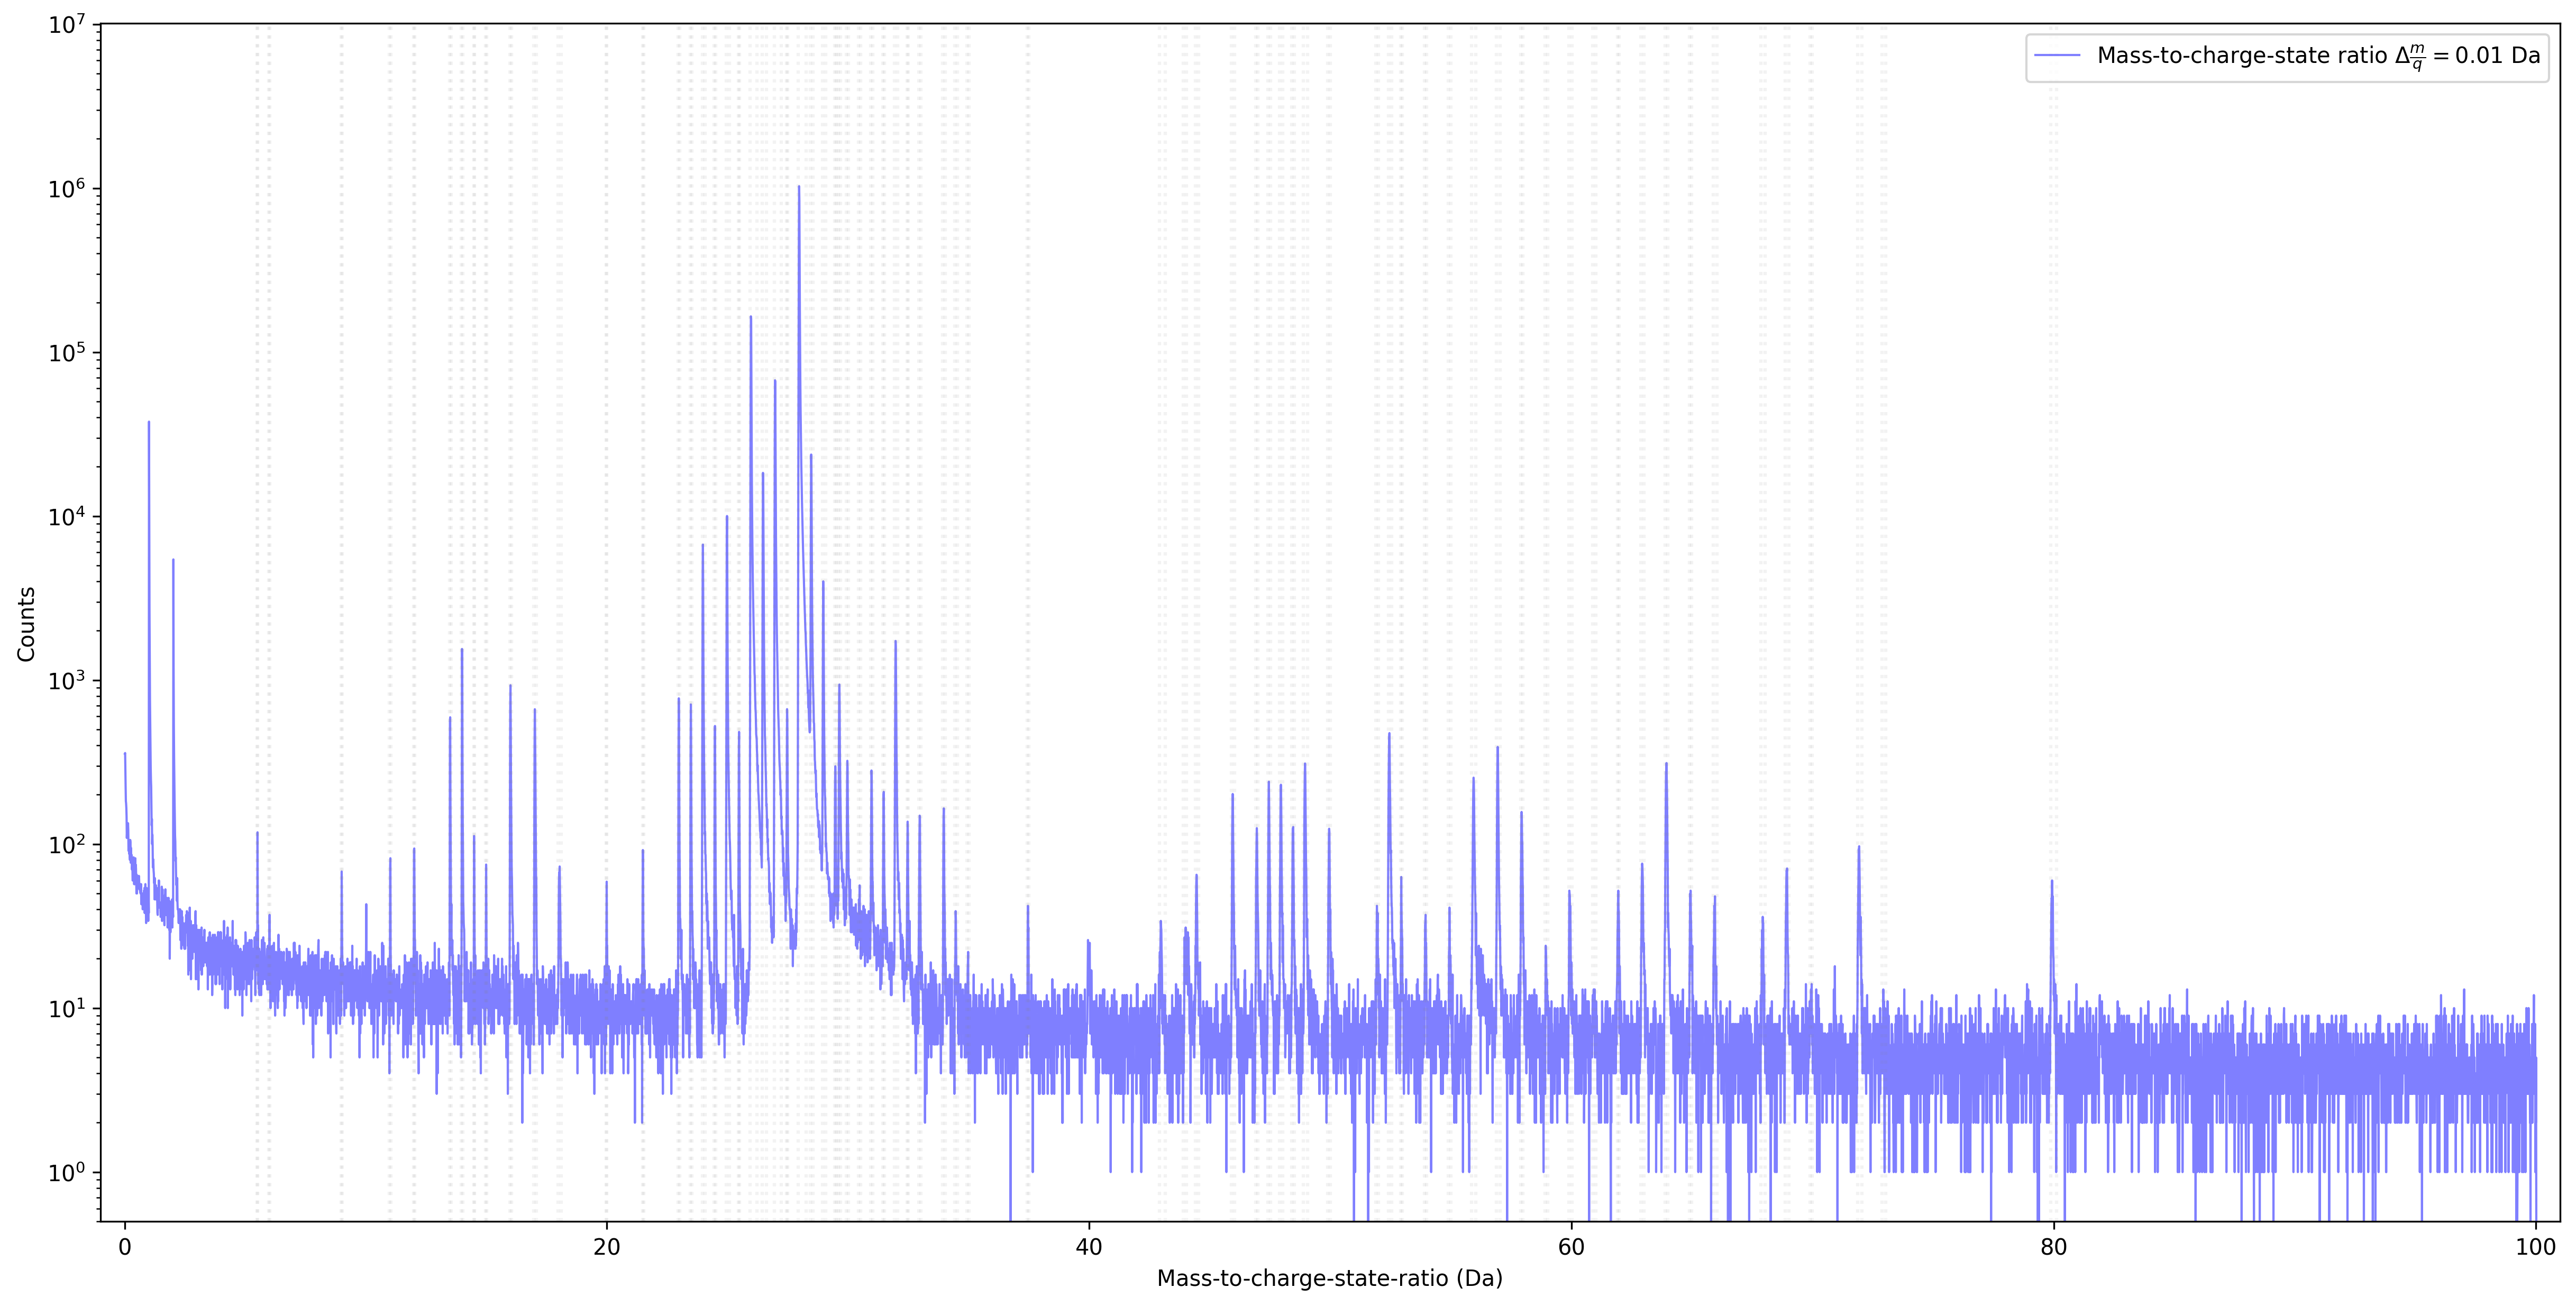

In [27]:
[xmi, xmx, ymi, ymx] = [mqmin, 10**np.ceil(np.log10(mqmax)), 0.5, 10**np.ceil(np.log10(np.max(xy[:,1])))]
[xmi, xmx, ymi, ymx] = [mqmin, mqmax, 0.5, 10**np.ceil(np.log10(np.max(xy[:,1])))]
fig, cnts_over_mq = plt.subplots(1, 1)
plt.plot(xy[:, 0], xy[:, 1], color='blue', alpha=0.5, linewidth=1.0)
for i in np.arange(1,nions + 1):
    # load ranges and plot them
    ranges = hf['entry/atom_probe/ranging/peak_identification/ion' + str(i) + '/mass_to_charge_range'][:]
    for min_max in ranges:
        cnts_over_mq.vlines(min_max[0], 0, 1, transform=cnts_over_mq.get_xaxis_transform(), alpha=0.1, color='grey', linestyles='dotted')
        cnts_over_mq.vlines(min_max[1], 0, 1, transform=cnts_over_mq.get_xaxis_transform(), alpha=0.1, color='grey', linestyles='dotted')
        #rng = Rectangle((min_max[0], ymi), min_max[1] - min_max[0], ymx - ymi, edgecolor='r', facecolor="none")
# plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['Min', '0.0025', '0.025', '0.25', '0.50', '0.75', '0.975', '0.9975', 'Max'])
plt.yscale('log')
plt.legend( [r'Mass-to-charge-state ratio $\Delta\frac{m}{q} = $'+str(mqincr)+' Da'], loc='upper right')
plt.xlabel(r'Mass-to-charge-state-ratio (Da)')
plt.ylabel(r'Counts')
print('Mass-to-charge-state histogram visualized.')
# scale bar with add margin to the bottom and top of the yaxis to avoid that lines fall on x axis
margin=0.01  # polishing the margins
plt.xlim([-margin * (xmx - xmi) + xmi, +margin * (xmx - xmi) + xmx])
plt.ylim([ymi, +margin * (ymx - ymi) + ymx])

In [28]:
#plot the figure
figfn = h5_file_name + '.MassToChargeStateRatios.png'
fig.savefig(figfn, dpi=300, facecolor='w', edgecolor='w', orientation='landscape', format='png', 
            transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)
#plt.close('all')
print(figfn + ' stored to disk.')

apm3.test.nxs.MassToChargeStateRatios.png stored to disk.


### NEW ISSUES:

* Add more sophisticated legend and names for iontypes
* Make the above plot interactive, maybe directly inside h5web or another ipywidget?
* Feel free to explore our paraprobe container in the north branch for more advanced processing